In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Task 1
Write down the differential equation describing the system of chemical equations (assuming a volume of 1)
<br>
- ∅ → X at a rate 1
<br>
- X → Y at rate 2
<br>
- 2 X + Y → 3 X at rate 0.02
<br>
- X → ∅ at rate 0.04

In [20]:
def rxn(Z, t):
    X = Z[0]
    Y = Z[1]
    k1 = 1
    k2 = 2
    k3 = 0.02
    k4 = 0.04
    
    r1 = k1
    r2 = k2 * X
    r3 = k3 * X * X * Y
    r4 = k4 * X
    
    dXdt = r1 - r2 - 2 * r3 + 3 * r3 - r4
    dYdt = r2 - r3
    
    return [dXdt, dYdt]

# Task 2
Use a package to solve the differential equation for 500 time units starting from X(0)=Y(0)=0 (matlab will do this)

In [21]:
from scipy.integrate import odeint

t = np.arange(0, 501) # time steps
X0 = 0
Y0 = 0
Z = (X0, Y0)
conc = odeint(rxn, Z, t)

cX = conc[:, 0]
cY = conc[:, 1]

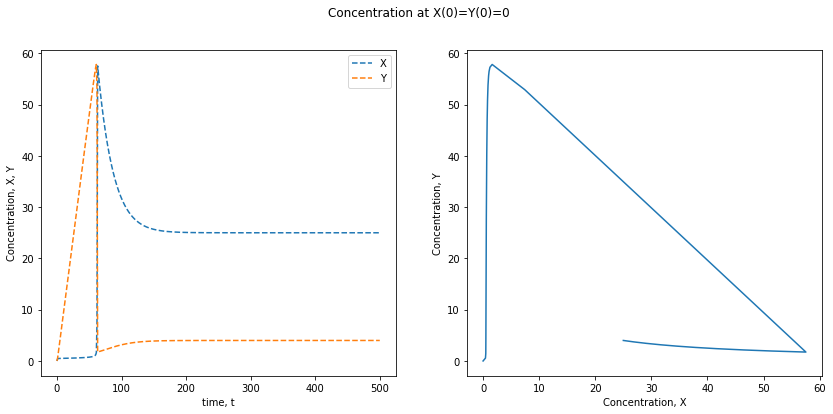

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Concentration at X(0)=Y(0)=0')

ax1.plot(t, cX, '--', label='X')
ax1.plot(t, cY, '--', label='Y')
ax1.legend()
ax1.set(xlabel='time, t', ylabel='Concentration, X, Y')

ax2.plot(cX, cY)
ax2.set(xlabel='Concentration, X', ylabel='Concentration, Y')

plt.show()

# Task 3
Write a Gillespie algorithm to simulate the same four chemical equation and plot the results for 500 time units (note that this is a lot of data to plot and you might want to save and plot the data only after X or Y have changed in number by at least 5.

In [9]:
from pyssa.simulation import Simulation

In [10]:
V_r = np.array([[0, 1, 2, 1], [0, 0, 1, 0]])

V_p = np.array([[1, 0, 3, 0], [0, 1, 0, 0]])

X0 = np.array([0, 0])

k = np.array([1, 2, 0.02, 0.04])

sim = Simulation(V_r, V_p, X0, k)

In [11]:
%time sim.simulate(max_t=500, max_iter=100000, n_procs=2, n_reps=1)
results = sim.results

CPU times: user 13.9 ms, sys: 16.4 ms, total: 30.3 ms
Wall time: 449 ms


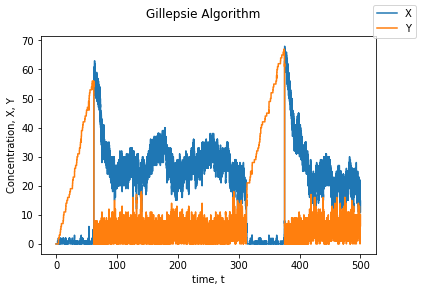

In [26]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ax = sim.plot(disp=False, names=['X', 'Y'])
fig.suptitle('Gillepsie Algorithm')
ax.set_xlabel('time, t')
ax.set_ylabel('Concentration, X, Y')
plt.show()


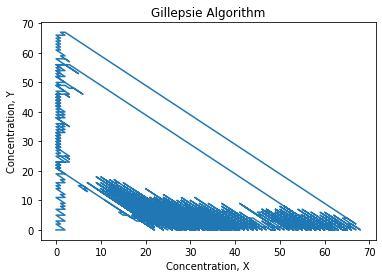

In [30]:
plt.plot(results[0][0][:, 0], results[0][0][:, 1])
plt.title('Gillepsie Algorithm')
plt.xlabel('Concentration, X')
plt.ylabel('Concentration, Y')
plt.show()